In [1]:
import sys
import os
from glob import glob
sys.path.append("../NEAT")
from NEATModels import NEATFocus, nets
from NEATModels.config import dynamic_config
from NEATUtils import helpers
from NEATUtils.helpers import save_json, load_json
os.environ["CUDA_VISIBLE_DEVICES"]="1"
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"


Using TensorFlow backend.


In [2]:
npz_directory = '/home/sancere/Kepler/CurieTrainingDatasets/foconeatnpz/'
npz_name = 'Foconeat.npz'
npz_val_name = 'FoconeatVal.npz'

#Read and Write the h5 file, directory location and name
model_dir =  '/home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/'
model_name = 'cadhistoned29s4f16resmulti.h5'

In [3]:
#Neural network parameters
focus_categories_json = model_dir + 'FocusCategories.json'
key_categories = load_json(focus_categories_json)
focus_cord_json = model_dir + 'FocusCord.json'
key_cord = load_json(focus_cord_json)

#For ORNET use residual = True and for OSNET use residual = False
residual = True
#NUmber of starting convolutional filters, is doubled down with increasing depth
startfilter = 16
#CNN network start layer, mid layers and lstm layer kernel size
start_kernel = 7

mid_kernel = 3
#Network depth has to be 9n + 2, n= 3 or 4 is optimal for Notum dataset
depth = 29
#Size of the gradient descent length vector, start small and use callbacks to get smaller when reaching the minima
learning_rate = 1.0E-3
#For stochastic gradient decent, the batch size used for computing the gradients
batch_size = 10

#Training epochs, longer the better with proper chosen learning rate
epochs = 250
nboxes = 1
#The inbuilt model stride which is equal to the nulber of times image was downsampled by the network
show = True
stage_number = 4
last_conv_factor = 8
size_tminus = 1
size_tplus = 1
imagex = 96
imagey = 96
multievent = True

In [4]:

config = dynamic_config(npz_directory =npz_directory, npz_name = npz_name, npz_val_name = npz_val_name, 
                         key_categories = key_categories, key_cord = key_cord,  imagex = imagex,
                         imagey = imagey, size_tminus = size_tminus, size_tplus =size_tplus, epochs = epochs, multievent = multievent,
                         residual = residual, depth = depth, start_kernel = start_kernel, mid_kernel = mid_kernel, stage_number = stage_number, last_conv_factor = last_conv_factor,
                         show = show, startfilter = startfilter, batch_size = batch_size, model_name = model_name)

config_json = config.to_json()

print(config)
save_json(config_json, model_dir + os.path.splitext(model_name)[0] + '_Parameter.json')

dynamic_config(batch_size=10, box_vector=6, categories=3, depth=29, epochs=250, imagex=96, imagey=96, key_categories={'Totaloff': 0, 'BestCad': 1, 'BestNuclei': 2}, key_cord={'x': 0, 'y': 1, 'z': 2, 'h': 3, 'w': 4, 'c': 5}, last_conv_factor=8, learning_rate=0.0001, lstm_hidden_unit=16, lstm_kernel=3, mid_kernel=3, model_name='cadhistoned29s4f16resmulti.h5', multievent=True, nboxes=1, npz_directory='/home/sancere/Kepler/CurieTrainingDatasets/foconeatnpz/', npz_name='Foconeat.npz', npz_val_name='FoconeatVal.npz', residual=True, show=True, size_tminus=1, size_tplus=1, stage_number=4, start_kernel=7, startfilter=16, stride=8, yolo_v0=True, yolo_v1=False, yolo_v2=False)


number of  images:	 10819
image size (3D):		 (3, 96, 96)
axes:				 SZYXC
channels in / out:		 1
number of  images:	 570
image size (3D):		 (3, 96, 96)
axes:				 SZYXC
channels in / out:		 1
(3, 96, 96, 1)
sigmoid


2021-08-27 13:06:46.216533: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-27 13:06:46.287728: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:73:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2021-08-27 13:06:46.287973: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-08-27 13:06:46.289346: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-08-27 13:06:46.290827: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-08-27 13:06:46.291117: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3, None, None 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 3, None, None 5504        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 3, None, None 64          conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 3, None, None 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

Train on 10819 samples, validate on 570 samples
Epoch 1/250


2021-08-27 13:07:05.899450: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2021-08-27 13:07:07.116095: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10


10819/10819 [==============================] - 180s 17ms/step - loss: 1.5745 - accuracy: 0.0039 - val_loss: 1.4406 - val_accuracy: 0.0035

Epoch 00001: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


<Figure size 432x288 with 0 Axes>

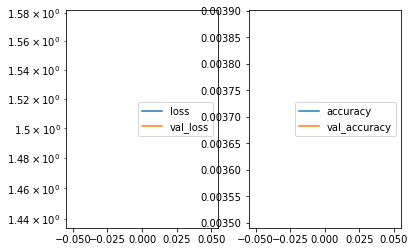

[[9.9968016e-01 3.7184829e-04 4.7229111e-04 4.8036742e-01 4.6352401e-01
  4.9623644e-01 9.9999738e-01 9.9999952e-01 6.3402647e-01]]
True Cell type: Totaloff
x [[[0.48036742]]]
True positional value x 0.5
y [[[0.463524]]]
True positional value y 0.5
z [[[0.49623644]]]
True positional value z 0.5
h [[[0.9999974]]]
True positional value h 1.0
w [[[0.9999995]]]
True positional value w 1.0
c [[[0.63402647]]]
True positional value c 1.0


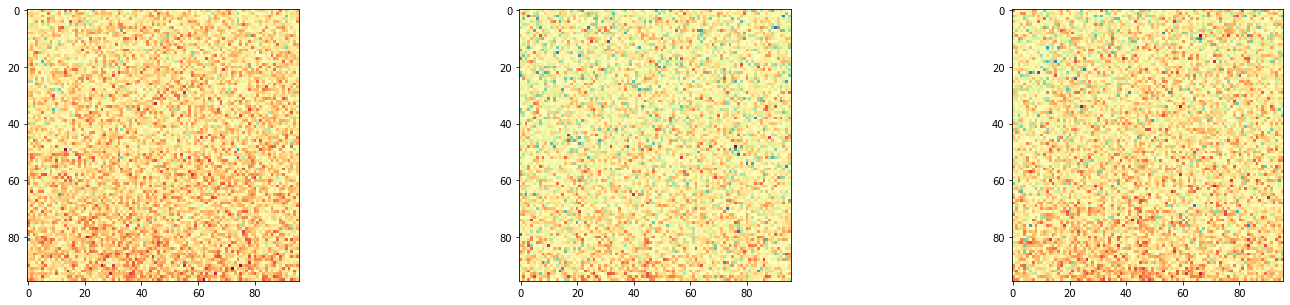

Epoch 2/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3915 - accuracy: 0.0336 - val_loss: 1.3561 - val_accuracy: 0.0737

Epoch 00002: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


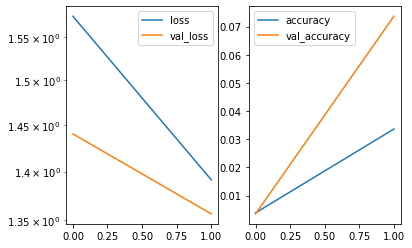

[[9.9992502e-01 3.8128514e-05 1.5386745e-03 4.9819231e-01 4.9150458e-01
  5.1158106e-01 9.9999309e-01 9.9999881e-01 6.0039806e-01]]
True Cell type: Totaloff
x [[[0.4981923]]]
True positional value x 0.5
y [[[0.49150458]]]
True positional value y 0.5
z [[[0.51158106]]]
True positional value z 0.5
h [[[0.9999931]]]
True positional value h 1.0
w [[[0.9999988]]]
True positional value w 1.0
c [[[0.60039806]]]
True positional value c 1.0


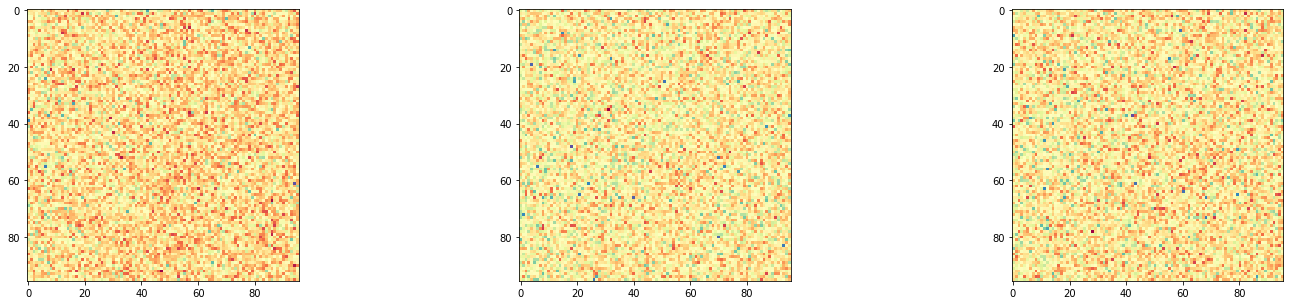

Epoch 3/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3437 - accuracy: 0.1328 - val_loss: 1.3267 - val_accuracy: 0.6193

Epoch 00003: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


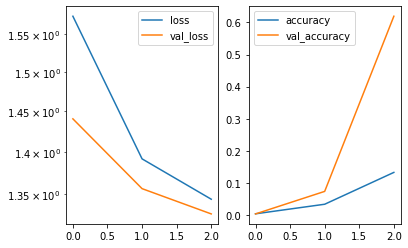

[[0.00248394 0.00264221 0.9974437  0.4921172  0.5191159  0.50691307
  0.9998086  0.99993694 0.5718946 ]]
True Cell type: BestNuclei
x [[[0.4921172]]]
True positional value x 0.5
y [[[0.5191159]]]
True positional value y 0.5
z [[[0.50691307]]]
True positional value z 0.5
h [[[0.9998086]]]
True positional value h 1.0
w [[[0.99993694]]]
True positional value w 1.0
c [[[0.5718946]]]
True positional value c 1.0


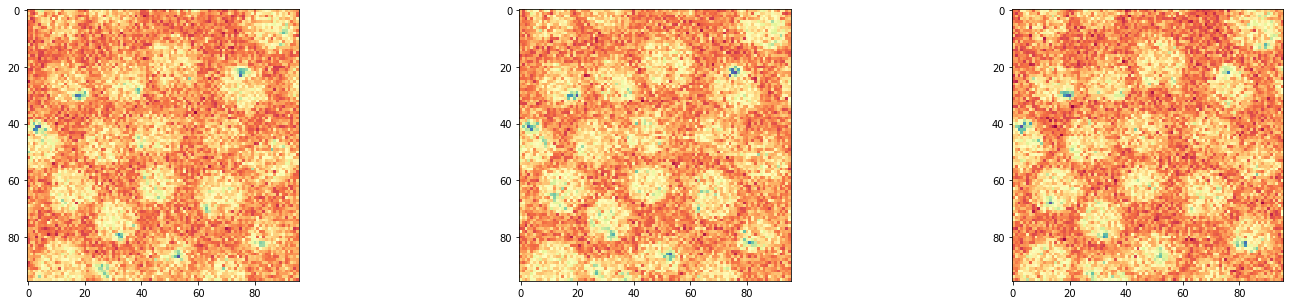

Epoch 4/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3285 - accuracy: 0.2675 - val_loss: 1.3279 - val_accuracy: 0.1070

Epoch 00004: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


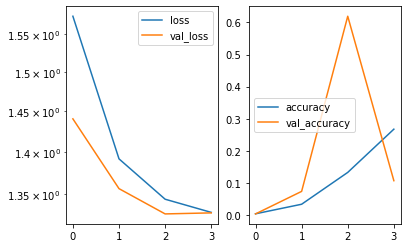

[[9.9940336e-01 8.8069978e-04 1.2850460e-04 5.1194924e-01 4.9269584e-01
  5.0462735e-01 9.9997962e-01 9.9999571e-01 5.8038384e-01]]
True Cell type: Totaloff
x [[[0.51194924]]]
True positional value x 0.5
y [[[0.49269584]]]
True positional value y 0.5
z [[[0.50462735]]]
True positional value z 0.5
h [[[0.9999796]]]
True positional value h 1.0
w [[[0.9999957]]]
True positional value w 1.0
c [[[0.58038384]]]
True positional value c 1.0


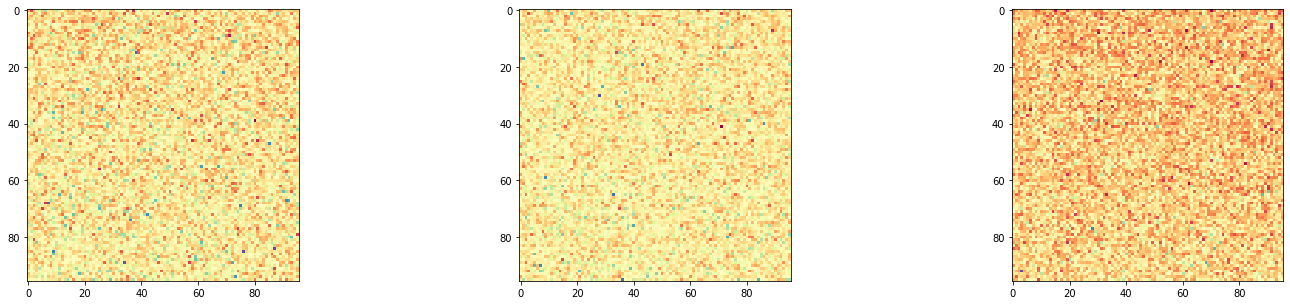

Epoch 5/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3206 - accuracy: 0.3258 - val_loss: 1.3451 - val_accuracy: 0.8386

Epoch 00005: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


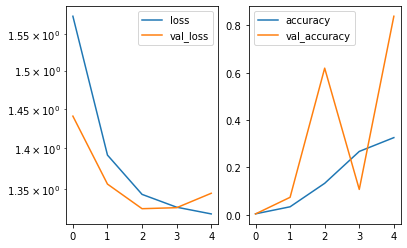

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 4.3175377e-10 1.8365258e-06 5.1453847e-01
    5.0221080e-01 5.1001626e-01 9.9999154e-01 9.9999833e-01
    6.0148424e-01]]]]
True Cell type: Totaloff
x [[[0.51453847]]]
True positional value x 0.5
y [[[0.5022108]]]
True positional value y 0.5
z [[[0.51001626]]]
True positional value z 0.5
h [[[0.99999154]]]
True positional value h 1.0
w [[[0.99999833]]]
True positional value w 1.0
c [[[0.60148424]]]
True positional value c 1.0


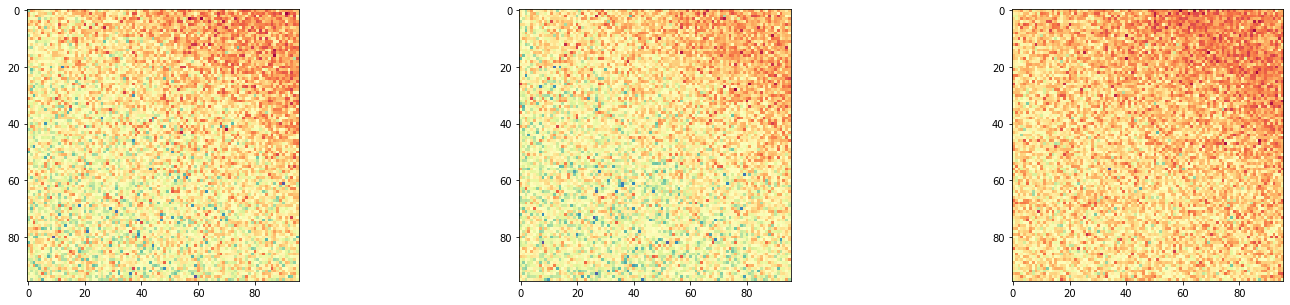

Epoch 6/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3132 - accuracy: 0.3720 - val_loss: 2.0734 - val_accuracy: 0.1281

Epoch 00006: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


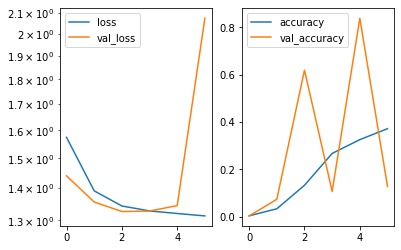

[[0.18091339 0.8172467  0.00333229 0.47926173 0.49366394 0.49869567
  0.99997365 0.9999951  0.5567347 ]]
True Cell type: Totaloff
x [[[0.47926173]]]
True positional value x 0.5
y [[[0.49366394]]]
True positional value y 0.5
z [[[0.49869567]]]
True positional value z 0.5
h [[[0.99997365]]]
True positional value h 1.0
w [[[0.9999951]]]
True positional value w 1.0
c [[[0.5567347]]]
True positional value c 1.0


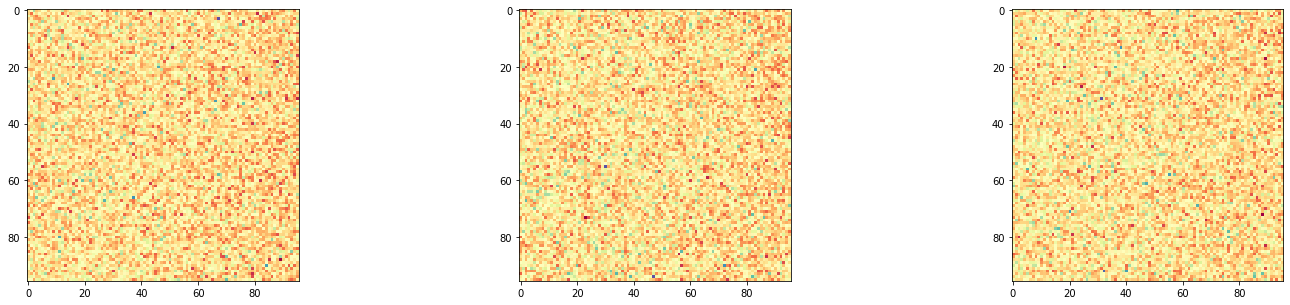

Epoch 7/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3037 - accuracy: 0.3949 - val_loss: 3.9813 - val_accuracy: 0.1228

Epoch 00007: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


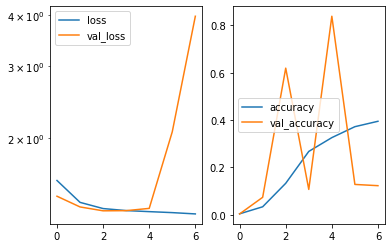

[[0.01200922 0.05333419 0.9010138  0.49824107 0.49613836 0.49203026
  0.99987197 0.99996257 0.5601566 ]]
True Cell type: Totaloff
x [[[0.49824107]]]
True positional value x 0.5
y [[[0.49613836]]]
True positional value y 0.5
z [[[0.49203026]]]
True positional value z 0.5
h [[[0.99987197]]]
True positional value h 1.0
w [[[0.99996257]]]
True positional value w 1.0
c [[[0.5601566]]]
True positional value c 1.0


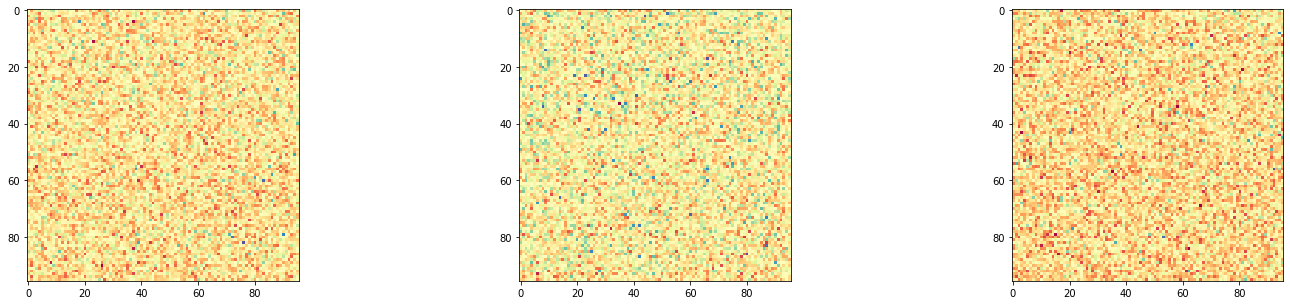

Epoch 8/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.3002 - accuracy: 0.3970 - val_loss: 1.2950 - val_accuracy: 0.2579

Epoch 00008: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


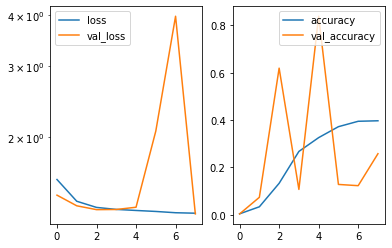

[[1.9933835e-04 2.0180080e-06 9.9999678e-01 5.0597346e-01 5.1452321e-01
  5.2418298e-01 9.9859256e-01 9.9931920e-01 5.7894647e-01]]
True Cell type: BestNuclei
x [[[0.50597346]]]
True positional value x 0.5
y [[[0.5145232]]]
True positional value y 0.5
z [[[0.524183]]]
True positional value z 0.5
h [[[0.99859256]]]
True positional value h 1.0
w [[[0.9993192]]]
True positional value w 1.0
c [[[0.5789465]]]
True positional value c 1.0


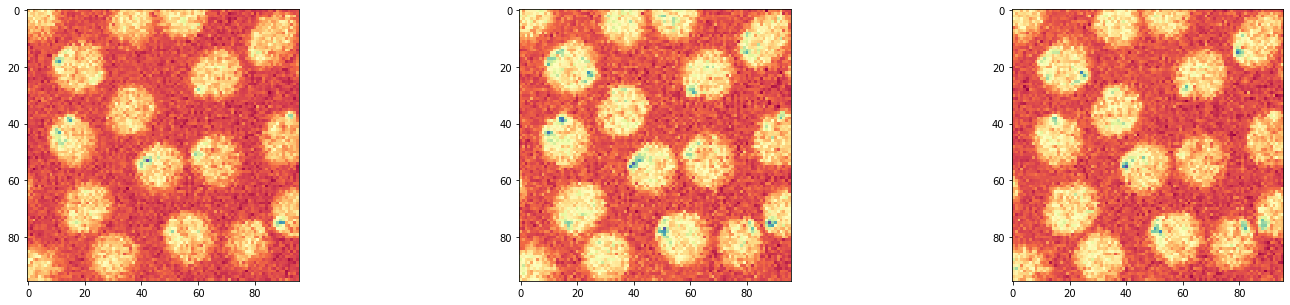

Epoch 9/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2927 - accuracy: 0.3009 - val_loss: 2.1719 - val_accuracy: 0.1456

Epoch 00009: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


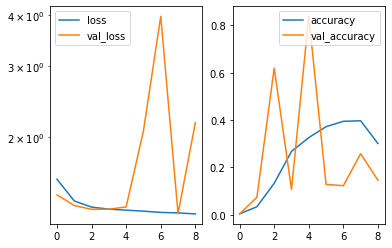

[[5.0972321e-04 9.3295902e-01 2.9652977e-02 4.8294044e-01 5.0081360e-01
  4.8452833e-01 9.9982327e-01 9.9995506e-01 5.2083129e-01]]
True Cell type: BestCad
x [[[0.48294044]]]
True positional value x 0.5
y [[[0.5008136]]]
True positional value y 0.5
z [[[0.48452833]]]
True positional value z 0.5
h [[[0.9998233]]]
True positional value h 1.0
w [[[0.99995506]]]
True positional value w 1.0
c [[[0.5208313]]]
True positional value c 1.0


Epoch 10/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2848 - accuracy: 0.4317 - val_loss: 1.2797 - val_accuracy: 0.1930

Epoch 00010: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


[[9.9997592e-01 4.5051471e-05 1.7886576e-05 4.9354735e-01 4.9531218e-01
  5.0894952e-01 9.9999106e-01 9.9999833e-01 5.4732406e-01]]
True Cell type: Totaloff
x [[[0.49354735]]]
True positional value x 0.5
y [[[0.49531218]]]
True positional value y 0.5
z [[[0.5089495]]]
True positional value z 0.5
h [[[0.99999106]]]
True positional value h 1.0
w [[[0.99999833]]]
True positional value w 1.0
c [[[0.54732406]]]
True positional value c 1.0


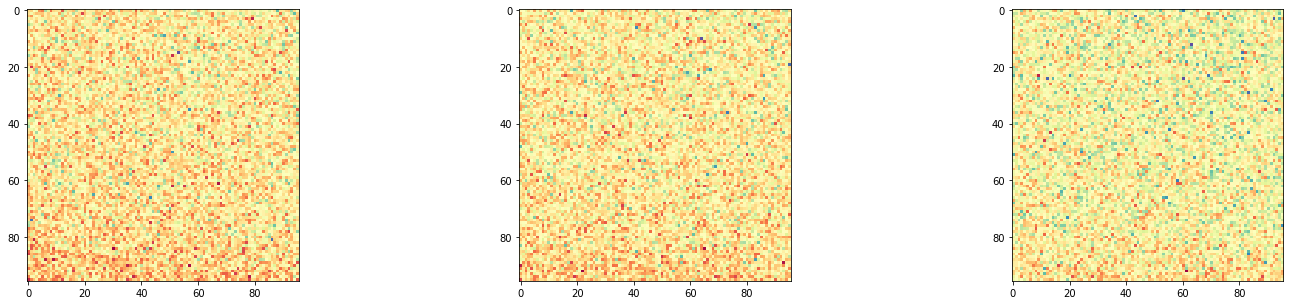

Epoch 11/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2788 - accuracy: 0.4094 - val_loss: 1.2751 - val_accuracy: 0.1684

Epoch 00011: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


[[9.9962831e-01 4.9655139e-04 3.8346974e-05 5.0595337e-01 5.0657350e-01
  5.1432663e-01 9.9997211e-01 9.9999332e-01 5.6315160e-01]]
True Cell type: Totaloff
x [[[0.5059534]]]
True positional value x 0.5
y [[[0.5065735]]]
True positional value y 0.5
z [[[0.51432663]]]
True positional value z 0.5
h [[[0.9999721]]]
True positional value h 1.0
w [[[0.9999933]]]
True positional value w 1.0
c [[[0.5631516]]]
True positional value c 1.0


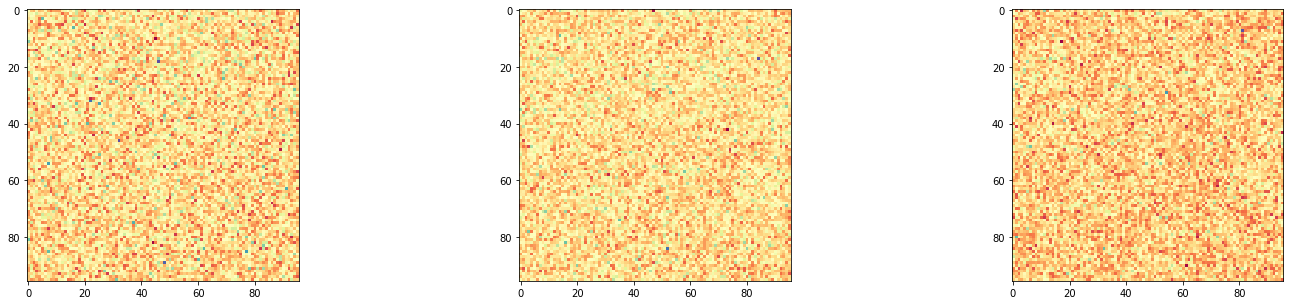

Epoch 12/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2736 - accuracy: 0.4822 - val_loss: 1.3460 - val_accuracy: 0.2860

Epoch 00012: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


[[4.6299971e-04 9.9985468e-01 1.8464398e-07 5.0402248e-01 4.9241173e-01
  5.0472969e-01 9.9979812e-01 9.9993455e-01 5.7506210e-01]]
True Cell type: BestCad
x [[[0.5040225]]]
True positional value x 0.5
y [[[0.49241173]]]
True positional value y 0.5
z [[[0.5047297]]]
True positional value z 0.5
h [[[0.9997981]]]
True positional value h 1.0
w [[[0.99993455]]]
True positional value w 1.0
c [[[0.5750621]]]
True positional value c 1.0


Epoch 13/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2691 - accuracy: 0.4988 - val_loss: 1.7993 - val_accuracy: 0.2140

Epoch 00013: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


[[0.12982745 0.838034   0.00326359 0.48668537 0.5033941  0.5053325
  0.99994314 0.9999857  0.5948397 ]]
True Cell type: Totaloff
x [[[0.48668537]]]
True positional value x 0.5
y [[[0.5033941]]]
True positional value y 0.5
z [[[0.5053325]]]
True positional value z 0.5
h [[[0.99994314]]]
True positional value h 1.0
w [[[0.9999857]]]
True positional value w 1.0
c [[[0.5948397]]]
True positional value c 1.0


Epoch 14/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2625 - accuracy: 0.5696 - val_loss: 1.8262 - val_accuracy: 0.1404

Epoch 00014: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


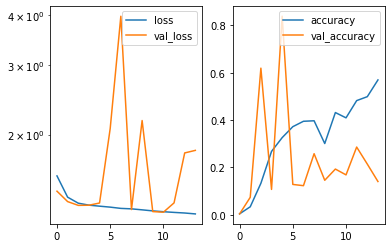

[[7.4838240e-06 3.1242228e-10 1.0000000e+00 5.1084584e-01 5.0004327e-01
  5.0663239e-01 9.9974114e-01 9.9991000e-01 5.5497098e-01]]
True Cell type: BestNuclei
x [[[0.51084584]]]
True positional value x 0.5
y [[[0.5000433]]]
True positional value y 0.5
z [[[0.5066324]]]
True positional value z 0.5
h [[[0.99974114]]]
True positional value h 1.0
w [[[0.99991]]]
True positional value w 1.0
c [[[0.554971]]]
True positional value c 1.0


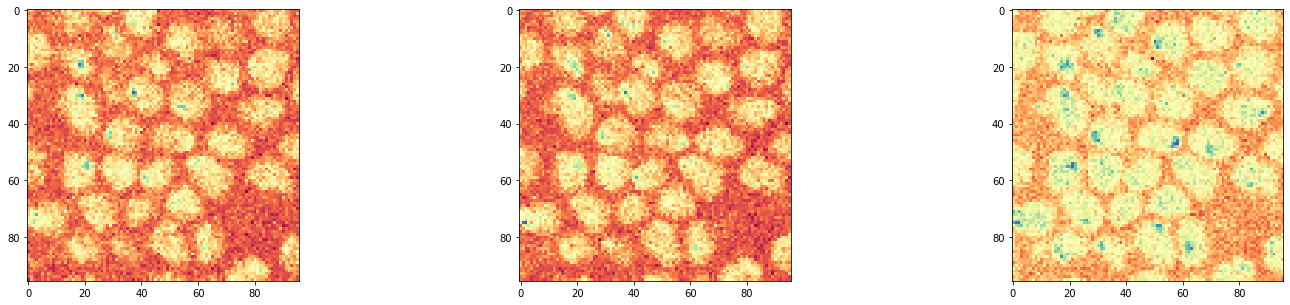

Epoch 15/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2564 - accuracy: 0.6354 - val_loss: 1.2535 - val_accuracy: 0.8596

Epoch 00015: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


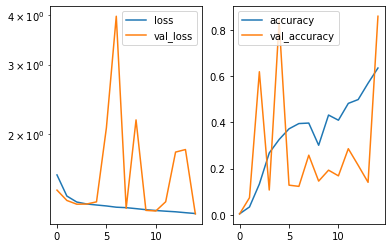

[[5.2266631e-07 1.4384040e-09 1.0000000e+00 4.7715917e-01 5.0406545e-01
  4.8476174e-01 9.9933702e-01 9.9976152e-01 5.6971741e-01]]
True Cell type: BestNuclei
x [[[0.47715917]]]
True positional value x 0.5
y [[[0.50406545]]]
True positional value y 0.5
z [[[0.48476174]]]
True positional value z 0.5
h [[[0.999337]]]
True positional value h 1.0
w [[[0.9997615]]]
True positional value w 1.0
c [[[0.5697174]]]
True positional value c 1.0


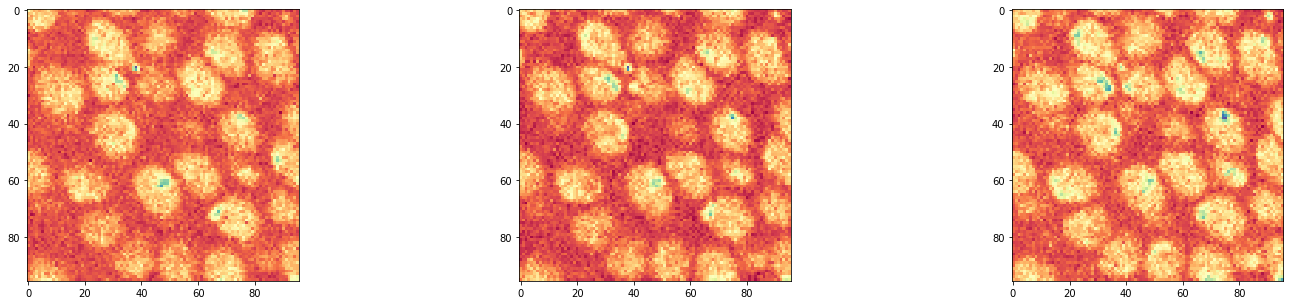

Epoch 16/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2513 - accuracy: 0.6420 - val_loss: 1.2477 - val_accuracy: 0.3439

Epoch 00016: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


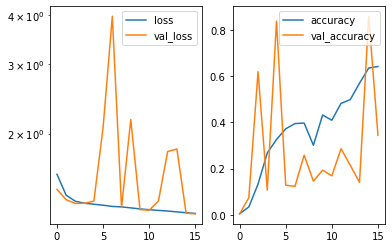

[[9.9960488e-01 7.5813889e-04 5.7613393e-06 5.0035721e-01 5.1068145e-01
  5.1558340e-01 9.9998844e-01 9.9999785e-01 5.7517862e-01]]
True Cell type: Totaloff
x [[[0.5003572]]]
True positional value x 0.5
y [[[0.51068145]]]
True positional value y 0.5
z [[[0.5155834]]]
True positional value z 0.5
h [[[0.99998844]]]
True positional value h 1.0
w [[[0.99999785]]]
True positional value w 1.0
c [[[0.5751786]]]
True positional value c 1.0


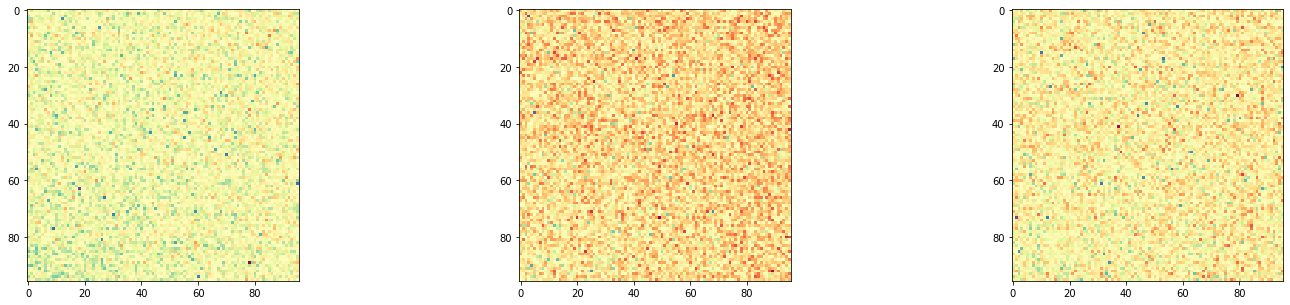

Epoch 17/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2454 - accuracy: 0.6248 - val_loss: 1.2437 - val_accuracy: 0.2123

Epoch 00017: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


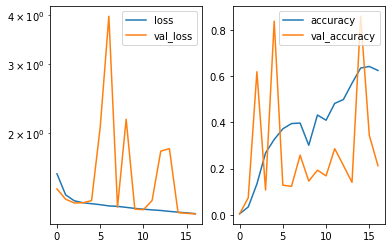

[[9.9993289e-01 1.0192953e-04 1.0251022e-05 4.9344206e-01 5.1372170e-01
  5.0431597e-01 9.9995482e-01 9.9998820e-01 5.8969861e-01]]
True Cell type: Totaloff
x [[[0.49344206]]]
True positional value x 0.5
y [[[0.5137217]]]
True positional value y 0.5
z [[[0.504316]]]
True positional value z 0.5
h [[[0.9999548]]]
True positional value h 1.0
w [[[0.9999882]]]
True positional value w 1.0
c [[[0.5896986]]]
True positional value c 1.0


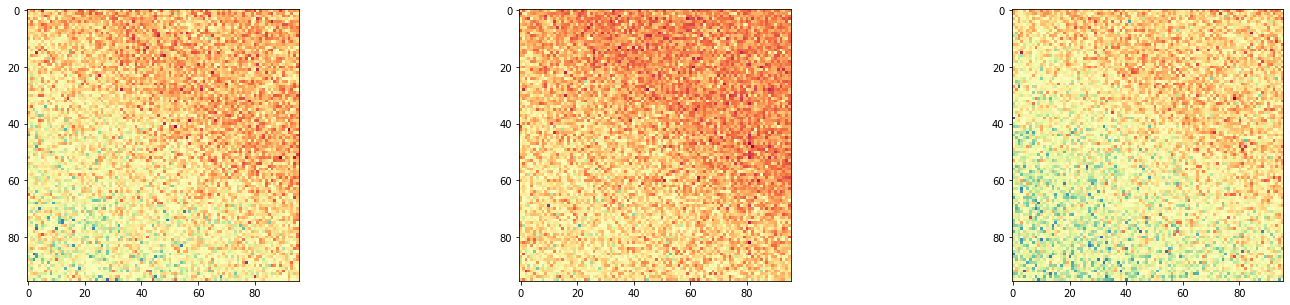

Epoch 18/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2413 - accuracy: 0.5612 - val_loss: 1.2471 - val_accuracy: 0.8754

Epoch 00018: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


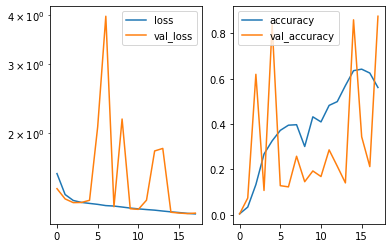

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 2.9461799e-22 7.8610616e-12 5.0288630e-01
    4.9313599e-01 5.1869923e-01 9.9999964e-01 1.0000000e+00
    6.1311334e-01]]]]
True Cell type: Totaloff
x [[[0.5028863]]]
True positional value x 0.5
y [[[0.493136]]]
True positional value y 0.5
z [[[0.5186992]]]
True positional value z 0.5
h [[[0.99999964]]]
True positional value h 1.0
w [[[1.]]]
True positional value w 1.0
c [[[0.61311334]]]
True positional value c 1.0


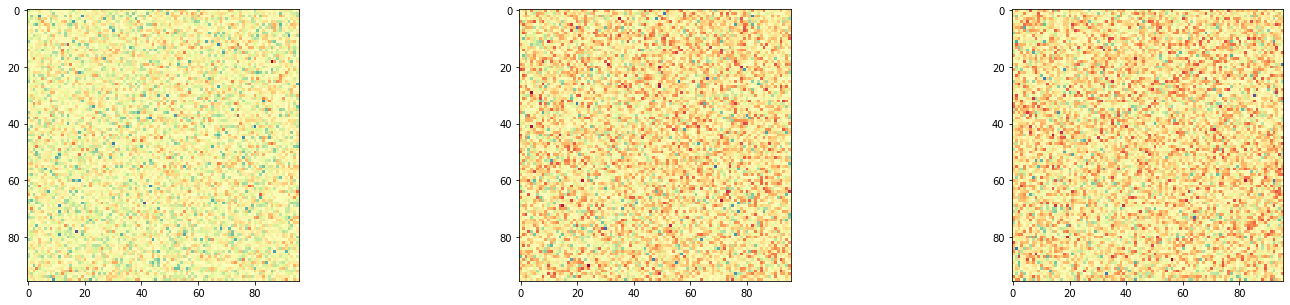

Epoch 19/250
10819/10819 [==============================] - 168s 16ms/step - loss: 1.2364 - accuracy: 0.5981 - val_loss: 1.2382 - val_accuracy: 0.7070

Epoch 00019: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


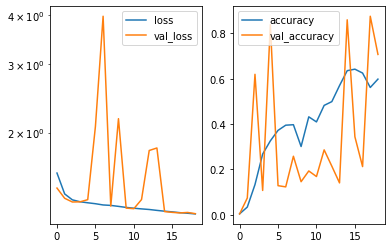

Predicted cell: Totaloff Probability: [[[[9.9999917e-01 7.1335296e-07 2.0684087e-05 5.1830024e-01
    4.9461120e-01 4.9741319e-01 9.9997973e-01 9.9999583e-01
    5.8652061e-01]]]]
True Cell type: Totaloff
x [[[0.51830024]]]
True positional value x 0.5
y [[[0.4946112]]]
True positional value y 0.5
z [[[0.4974132]]]
True positional value z 0.5
h [[[0.99997973]]]
True positional value h 1.0
w [[[0.9999958]]]
True positional value w 1.0
c [[[0.5865206]]]
True positional value c 1.0


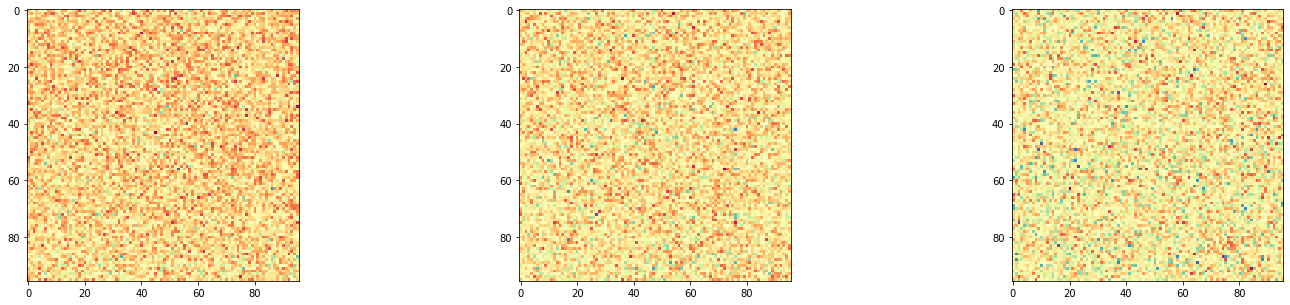

Epoch 20/250
10819/10819 [==============================] - 168s 16ms/step - loss: 1.2290 - accuracy: 0.6659 - val_loss: 1.2255 - val_accuracy: 0.3702

Epoch 00020: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


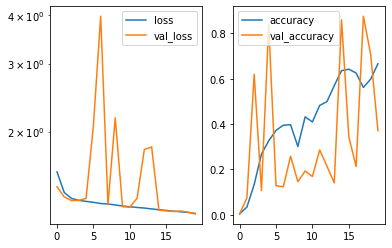

Predicted cell: Totaloff Probability: [[[[9.9999928e-01 6.1293343e-07 1.6221051e-06 5.0176823e-01
    4.9771062e-01 4.9493876e-01 9.9999309e-01 9.9999857e-01
    5.7942265e-01]]]]
True Cell type: Totaloff
x [[[0.50176823]]]
True positional value x 0.5
y [[[0.49771062]]]
True positional value y 0.5
z [[[0.49493876]]]
True positional value z 0.5
h [[[0.9999931]]]
True positional value h 1.0
w [[[0.99999857]]]
True positional value w 1.0
c [[[0.57942265]]]
True positional value c 1.0


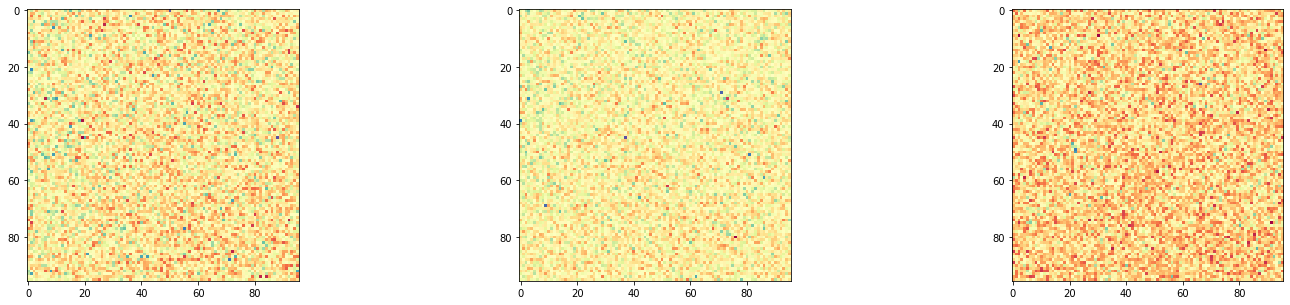

Epoch 21/250
10819/10819 [==============================] - 168s 16ms/step - loss: 1.2235 - accuracy: 0.6561 - val_loss: 1.2650 - val_accuracy: 0.1719

Epoch 00021: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


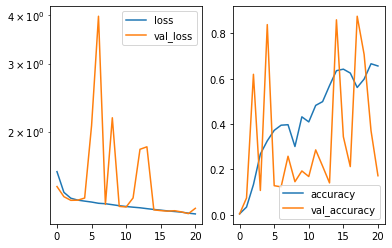

[[0.8709162  0.00227705 0.02811001 0.49790242 0.5174152  0.49723905
  0.9999732  0.9999932  0.5549791 ]]
True Cell type: Totaloff
x [[[0.49790242]]]
True positional value x 0.5
y [[[0.5174152]]]
True positional value y 0.5
z [[[0.49723905]]]
True positional value z 0.5
h [[[0.9999732]]]
True positional value h 1.0
w [[[0.9999932]]]
True positional value w 1.0
c [[[0.5549791]]]
True positional value c 1.0


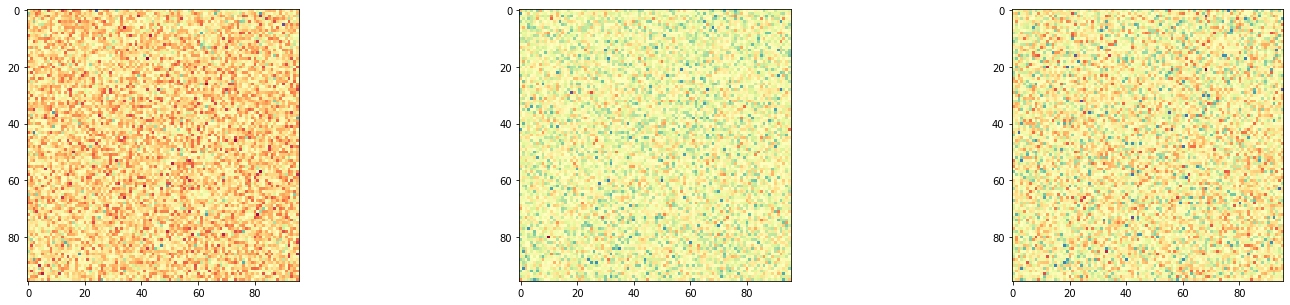

Epoch 22/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2176 - accuracy: 0.7515 - val_loss: 1.2215 - val_accuracy: 0.1895

Epoch 00022: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


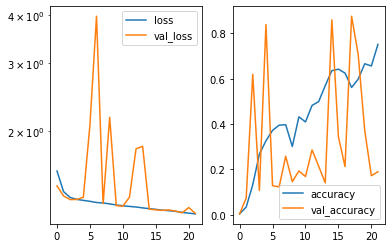

[[8.1498343e-05 8.8790807e-07 9.9999869e-01 5.0423884e-01 4.9066058e-01
  5.0900275e-01 9.9919897e-01 9.9966002e-01 5.5995333e-01]]
True Cell type: BestNuclei
x [[[0.50423884]]]
True positional value x 0.5
y [[[0.49066058]]]
True positional value y 0.5
z [[[0.50900275]]]
True positional value z 0.5
h [[[0.999199]]]
True positional value h 1.0
w [[[0.99966]]]
True positional value w 1.0
c [[[0.55995333]]]
True positional value c 1.0


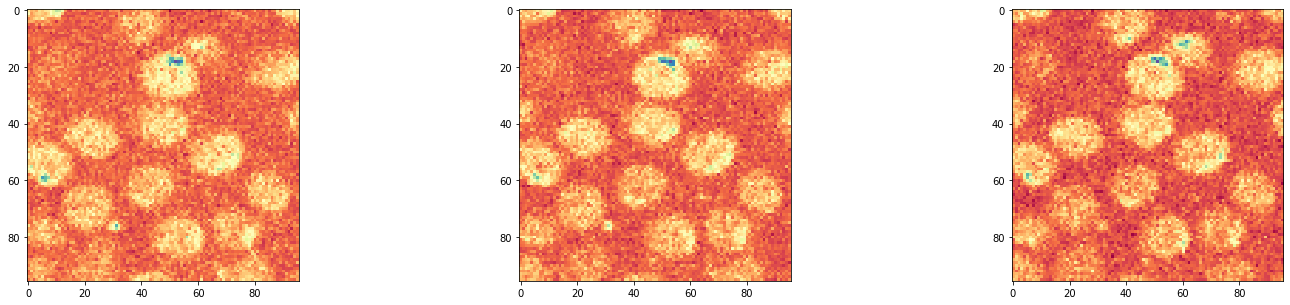

Epoch 23/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2148 - accuracy: 0.6763 - val_loss: 1.3996 - val_accuracy: 0.1895

Epoch 00023: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


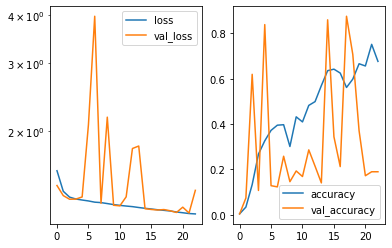

[[9.9615365e-01 2.7013379e-03 5.5246422e-04 5.1004624e-01 5.0918394e-01
  4.9799582e-01 9.9997771e-01 9.9999392e-01 5.6133366e-01]]
True Cell type: Totaloff
x [[[0.51004624]]]
True positional value x 0.5
y [[[0.50918394]]]
True positional value y 0.5
z [[[0.49799582]]]
True positional value z 0.5
h [[[0.9999777]]]
True positional value h 1.0
w [[[0.9999939]]]
True positional value w 1.0
c [[[0.56133366]]]
True positional value c 1.0


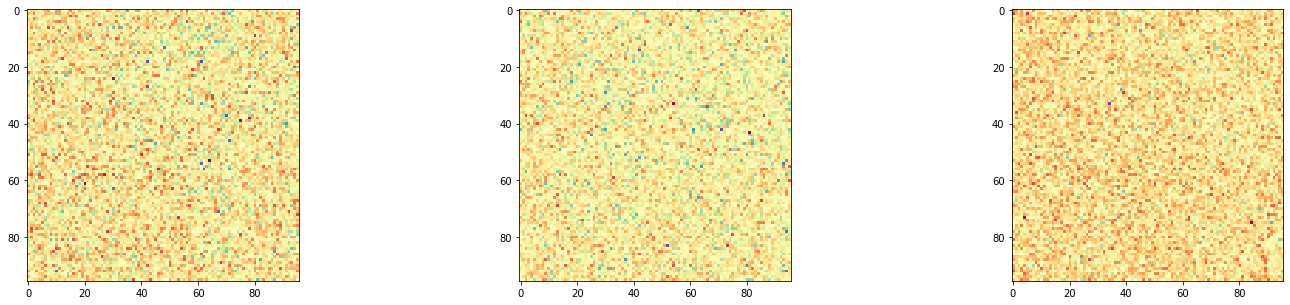

Epoch 24/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2093 - accuracy: 0.7125 - val_loss: 1.2060 - val_accuracy: 0.8632

Epoch 00024: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


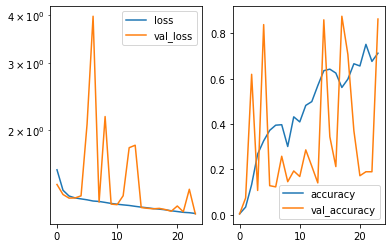

[[1.2427584e-04 9.9989176e-01 7.8512394e-06 4.9826604e-01 4.9004048e-01
  5.0257325e-01 9.9960440e-01 9.9982482e-01 5.9491640e-01]]
True Cell type: BestCad
x [[[0.49826604]]]
True positional value x 0.5
y [[[0.49004048]]]
True positional value y 0.5
z [[[0.50257325]]]
True positional value z 0.5
h [[[0.9996044]]]
True positional value h 1.0
w [[[0.9998248]]]
True positional value w 1.0
c [[[0.5949164]]]
True positional value c 1.0


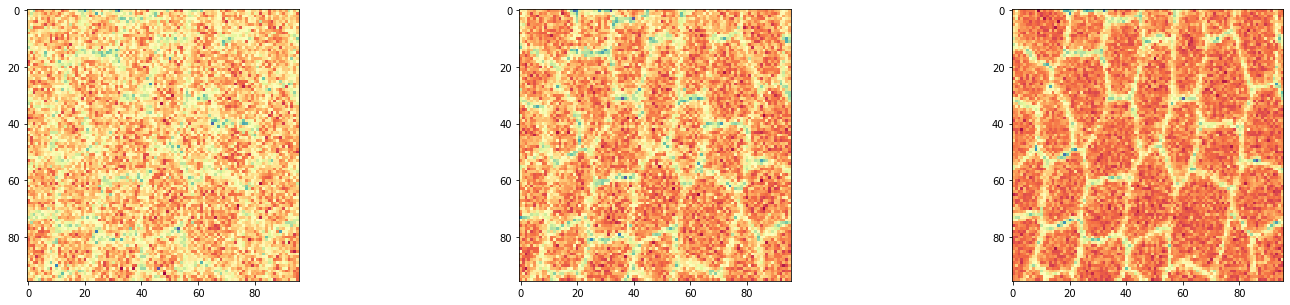

Epoch 25/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2038 - accuracy: 0.7429 - val_loss: 1.2060 - val_accuracy: 0.2947

Epoch 00025: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


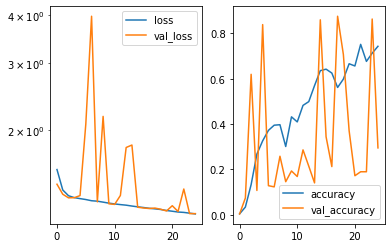

[[9.9961036e-01 7.7648024e-04 1.3183860e-07 5.0418675e-01 5.0209570e-01
  4.9951476e-01 9.9997354e-01 9.9999380e-01 5.9238040e-01]]
True Cell type: Totaloff
x [[[0.50418675]]]
True positional value x 0.5
y [[[0.5020957]]]
True positional value y 0.5
z [[[0.49951476]]]
True positional value z 0.5
h [[[0.99997354]]]
True positional value h 1.0
w [[[0.9999938]]]
True positional value w 1.0
c [[[0.5923804]]]
True positional value c 1.0


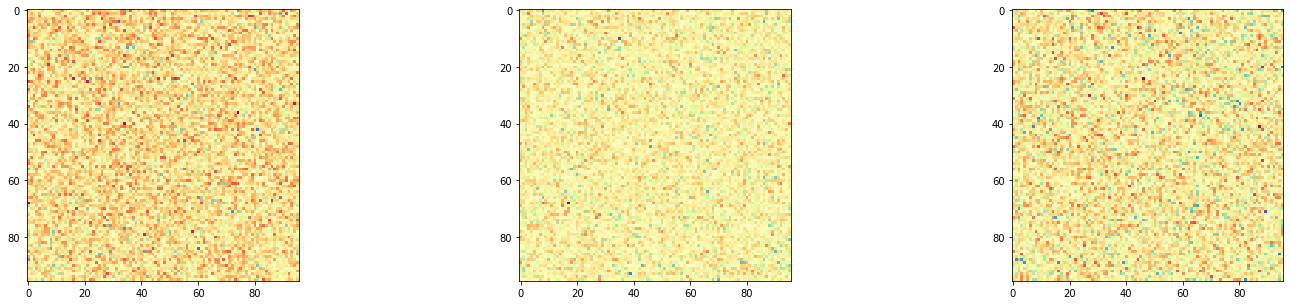

Epoch 26/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.2011 - accuracy: 0.6513 - val_loss: 1.1955 - val_accuracy: 0.8807

Epoch 00026: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


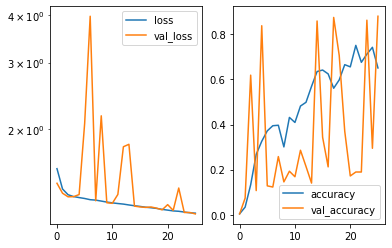

[[4.2391769e-04 9.9944991e-01 3.0095762e-04 4.9509519e-01 5.0989801e-01
  5.0191665e-01 9.9975282e-01 9.9991274e-01 5.8258212e-01]]
True Cell type: BestCad
x [[[0.4950952]]]
True positional value x 0.5
y [[[0.509898]]]
True positional value y 0.5
z [[[0.50191665]]]
True positional value z 0.5
h [[[0.9997528]]]
True positional value h 1.0
w [[[0.99991274]]]
True positional value w 1.0
c [[[0.5825821]]]
True positional value c 1.0


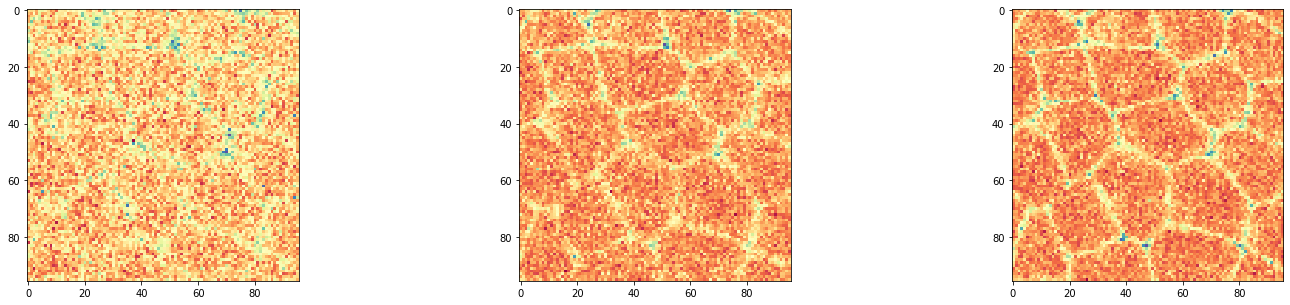

Epoch 27/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1927 - accuracy: 0.7421 - val_loss: 1.1898 - val_accuracy: 0.6175

Epoch 00027: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


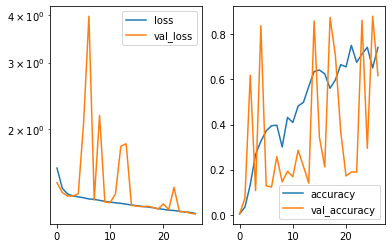

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 1.4724622e-08 8.4442860e-07 4.9373418e-01
    4.9819550e-01 4.9575540e-01 9.9998224e-01 9.9999583e-01
    5.9733891e-01]]]]
True Cell type: Totaloff
x [[[0.49373418]]]
True positional value x 0.5
y [[[0.4981955]]]
True positional value y 0.5
z [[[0.4957554]]]
True positional value z 0.5
h [[[0.99998224]]]
True positional value h 1.0
w [[[0.9999958]]]
True positional value w 1.0
c [[[0.5973389]]]
True positional value c 1.0


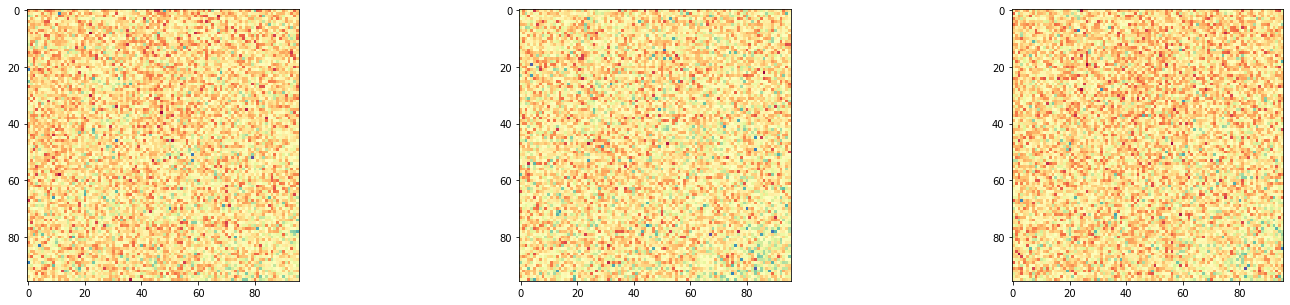

Epoch 28/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1870 - accuracy: 0.7325 - val_loss: 1.1841 - val_accuracy: 0.4912

Epoch 00028: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


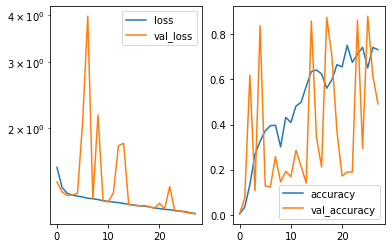

Predicted cell: Totaloff Probability: [[[[9.9999976e-01 2.6480828e-07 4.6940599e-07 4.9980813e-01
    5.0193810e-01 5.0737923e-01 9.9998605e-01 9.9999654e-01
    5.8322954e-01]]]]
True Cell type: Totaloff
x [[[0.49980813]]]
True positional value x 0.5
y [[[0.5019381]]]
True positional value y 0.5
z [[[0.50737923]]]
True positional value z 0.5
h [[[0.99998605]]]
True positional value h 1.0
w [[[0.99999654]]]
True positional value w 1.0
c [[[0.58322954]]]
True positional value c 1.0


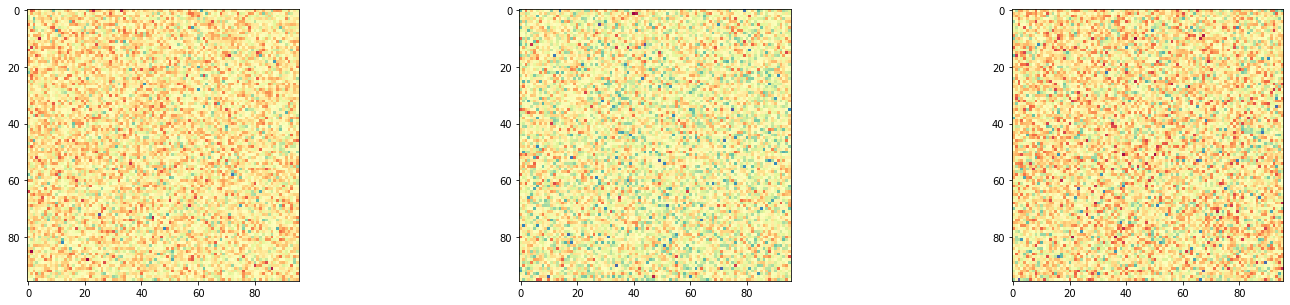

Epoch 29/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1829 - accuracy: 0.7242 - val_loss: 1.1947 - val_accuracy: 0.8825

Epoch 00029: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


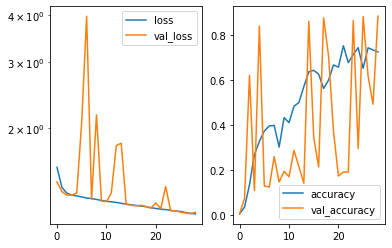

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 7.0676009e-14 4.9390305e-09 4.9230820e-01
    5.0903243e-01 4.8982719e-01 9.9999404e-01 9.9999881e-01
    5.9738350e-01]]]]
True Cell type: Totaloff
x [[[0.4923082]]]
True positional value x 0.5
y [[[0.5090324]]]
True positional value y 0.5
z [[[0.4898272]]]
True positional value z 0.5
h [[[0.99999404]]]
True positional value h 1.0
w [[[0.9999988]]]
True positional value w 1.0
c [[[0.5973835]]]
True positional value c 1.0


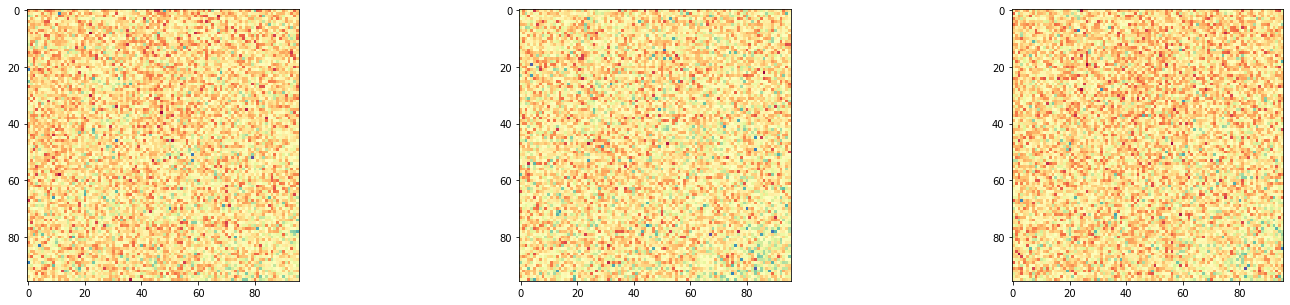

Epoch 30/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1803 - accuracy: 0.6828 - val_loss: 1.1752 - val_accuracy: 0.7702

Epoch 00030: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


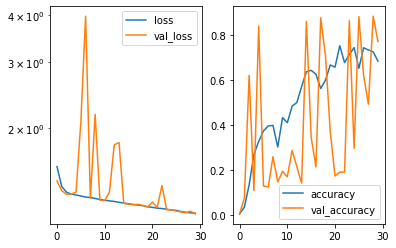

[[5.4050397e-05 9.9998939e-01 4.9387741e-06 4.9531487e-01 4.9411663e-01
  4.9253634e-01 9.9970835e-01 9.9989581e-01 5.6316763e-01]]
True Cell type: BestCad
x [[[0.49531487]]]
True positional value x 0.5
y [[[0.49411663]]]
True positional value y 0.5
z [[[0.49253634]]]
True positional value z 0.5
h [[[0.99970835]]]
True positional value h 1.0
w [[[0.9998958]]]
True positional value w 1.0
c [[[0.56316763]]]
True positional value c 1.0


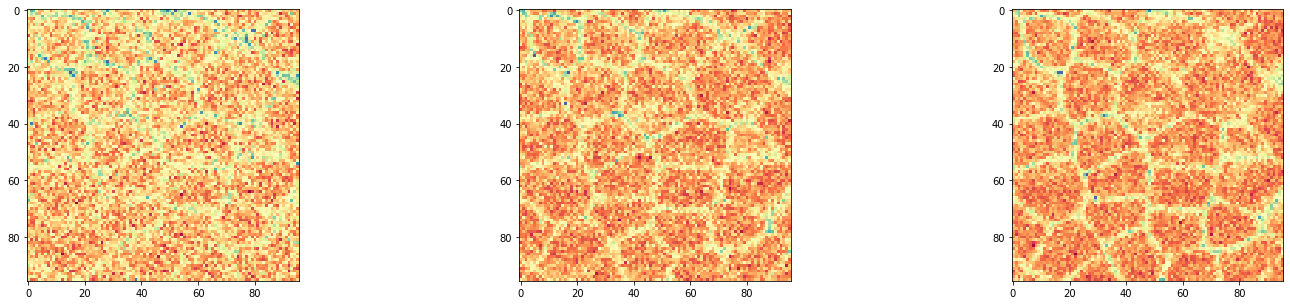

Epoch 31/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1730 - accuracy: 0.7186 - val_loss: 1.1722 - val_accuracy: 0.4965

Epoch 00031: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


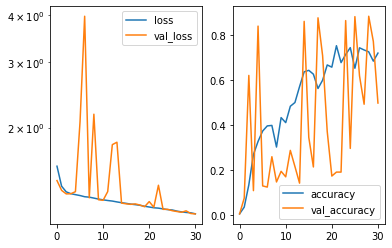

Predicted cell: Totaloff Probability: [[[[9.9999952e-01 4.3212583e-07 3.0922918e-06 5.0261664e-01
    4.9982721e-01 4.9800587e-01 9.9998546e-01 9.9999678e-01
    5.9661216e-01]]]]
True Cell type: Totaloff
x [[[0.50261664]]]
True positional value x 0.5
y [[[0.4998272]]]
True positional value y 0.5
z [[[0.49800587]]]
True positional value z 0.5
h [[[0.99998546]]]
True positional value h 1.0
w [[[0.9999968]]]
True positional value w 1.0
c [[[0.59661216]]]
True positional value c 1.0


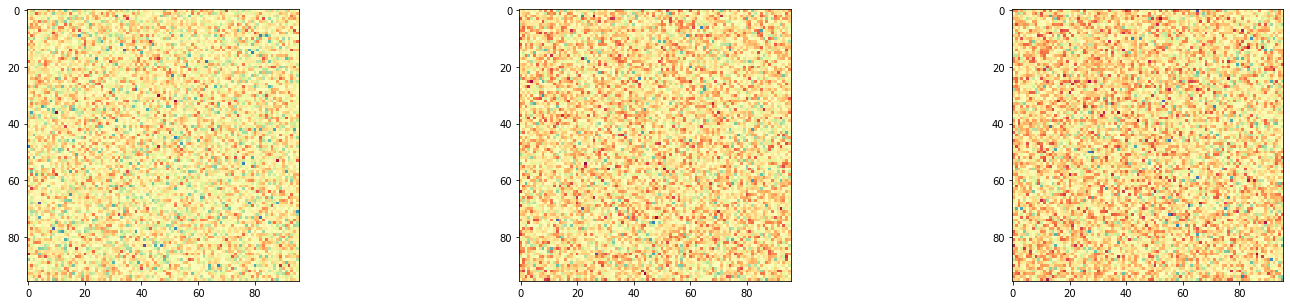

Epoch 32/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1675 - accuracy: 0.8175 - val_loss: 1.1660 - val_accuracy: 0.8947

Epoch 00032: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


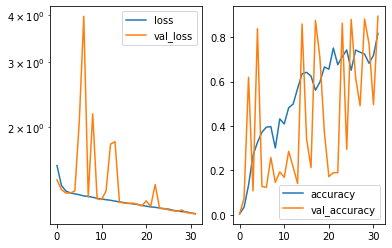

Predicted cell: Totaloff Probability: [[[[9.9999607e-01 8.0564023e-06 1.3966087e-05 5.0382799e-01
    4.9519187e-01 4.9108121e-01 9.9995947e-01 9.9999022e-01
    5.9699506e-01]]]]
True Cell type: Totaloff
x [[[0.503828]]]
True positional value x 0.5
y [[[0.49519187]]]
True positional value y 0.5
z [[[0.4910812]]]
True positional value z 0.5
h [[[0.99995947]]]
True positional value h 1.0
w [[[0.9999902]]]
True positional value w 1.0
c [[[0.59699506]]]
True positional value c 1.0


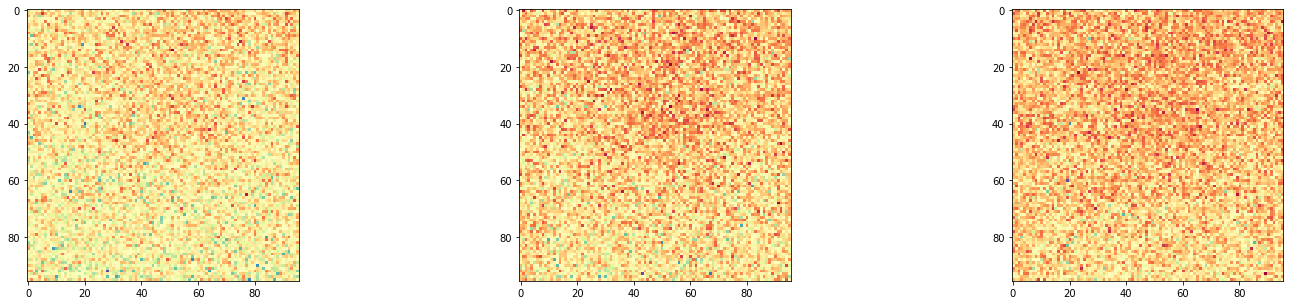

Epoch 33/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1625 - accuracy: 0.7928 - val_loss: 1.1608 - val_accuracy: 0.6263

Epoch 00033: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


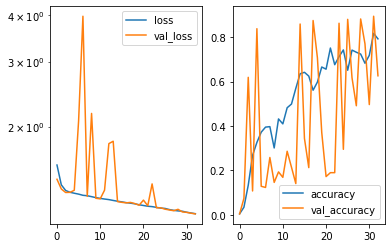

[[9.9991941e-01 1.4565786e-04 1.2457996e-06 4.9768445e-01 5.0896537e-01
  5.0482887e-01 9.9988437e-01 9.9996233e-01 5.8302230e-01]]
True Cell type: Totaloff
x [[[0.49768445]]]
True positional value x 0.5
y [[[0.5089654]]]
True positional value y 0.5
z [[[0.5048289]]]
True positional value z 0.5
h [[[0.99988437]]]
True positional value h 1.0
w [[[0.99996233]]]
True positional value w 1.0
c [[[0.5830223]]]
True positional value c 1.0


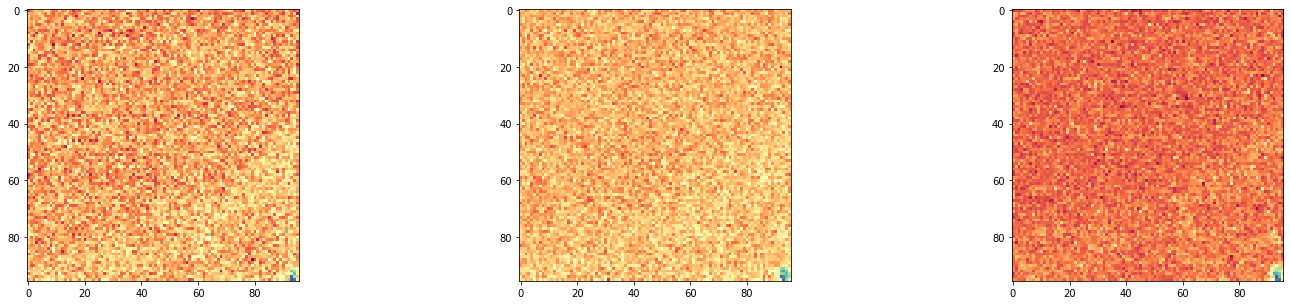

Epoch 34/250
10819/10819 [==============================] - 170s 16ms/step - loss: 1.1573 - accuracy: 0.7990 - val_loss: 1.1549 - val_accuracy: 0.8035

Epoch 00034: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


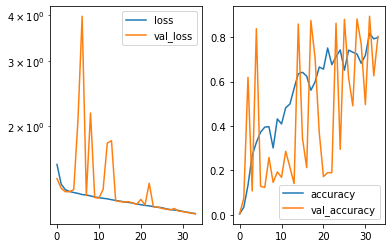

Predicted cell: Totaloff Probability: [[[[9.9999976e-01 2.7195523e-07 2.5689400e-05 4.9673092e-01
    5.0551426e-01 5.0484324e-01 9.9997318e-01 9.9999392e-01
    5.8763862e-01]]]]
True Cell type: Totaloff
x [[[0.49673092]]]
True positional value x 0.5
y [[[0.50551426]]]
True positional value y 0.5
z [[[0.50484324]]]
True positional value z 0.5
h [[[0.9999732]]]
True positional value h 1.0
w [[[0.9999939]]]
True positional value w 1.0
c [[[0.5876386]]]
True positional value c 1.0


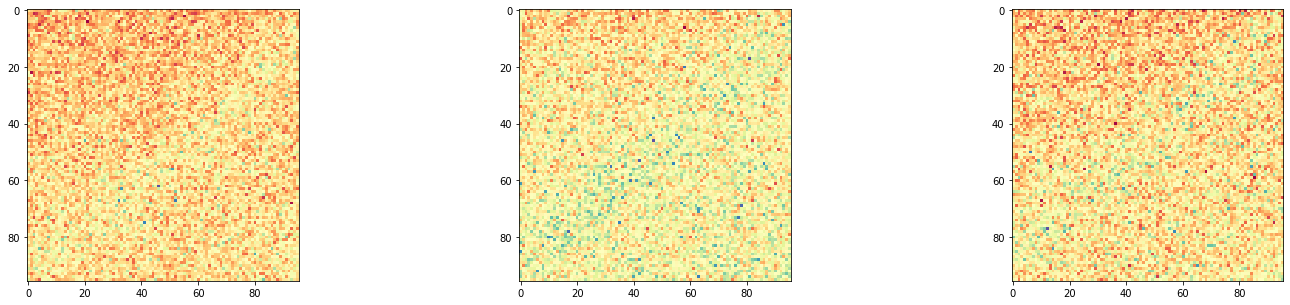

Epoch 35/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1524 - accuracy: 0.8338 - val_loss: 1.1522 - val_accuracy: 0.8228

Epoch 00035: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


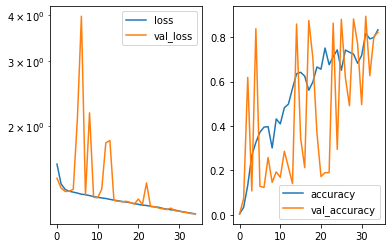

[[4.1206436e-06 9.9999928e-01 5.4556619e-07 5.0088775e-01 4.8632768e-01
  4.9821505e-01 9.9967813e-01 9.9987900e-01 5.6037867e-01]]
True Cell type: BestCad
x [[[0.50088775]]]
True positional value x 0.5
y [[[0.48632768]]]
True positional value y 0.5
z [[[0.49821505]]]
True positional value z 0.5
h [[[0.99967813]]]
True positional value h 1.0
w [[[0.999879]]]
True positional value w 1.0
c [[[0.5603787]]]
True positional value c 1.0


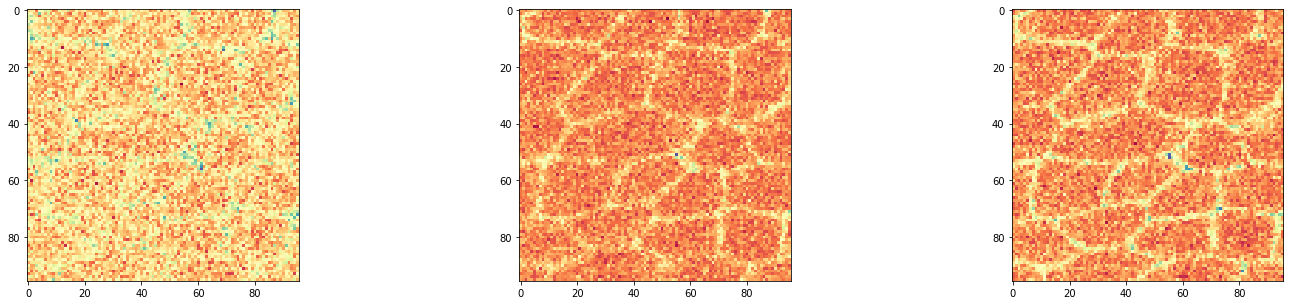

Epoch 36/250
10819/10819 [==============================] - 170s 16ms/step - loss: 1.1480 - accuracy: 0.8752 - val_loss: 1.1460 - val_accuracy: 0.5246

Epoch 00036: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


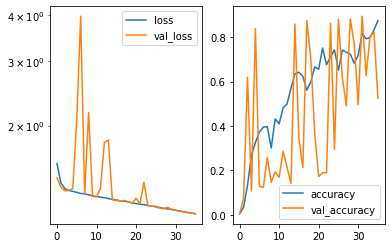

[[9.9986339e-01 1.2111439e-04 2.0051140e-05 5.0420791e-01 5.0903732e-01
  4.9868691e-01 9.9996424e-01 9.9999046e-01 5.8924454e-01]]
True Cell type: Totaloff
x [[[0.5042079]]]
True positional value x 0.5
y [[[0.5090373]]]
True positional value y 0.5
z [[[0.4986869]]]
True positional value z 0.5
h [[[0.99996424]]]
True positional value h 1.0
w [[[0.99999046]]]
True positional value w 1.0
c [[[0.58924454]]]
True positional value c 1.0


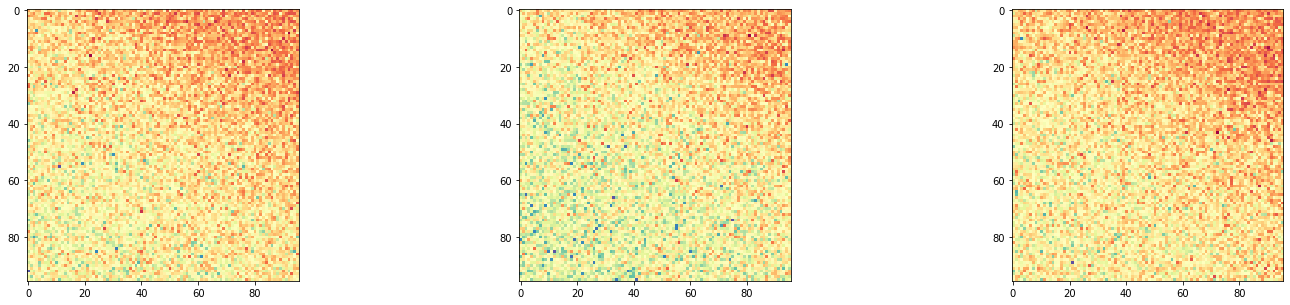

Epoch 37/250
10819/10819 [==============================] - 170s 16ms/step - loss: 1.1431 - accuracy: 0.8458 - val_loss: 1.1409 - val_accuracy: 0.7965

Epoch 00037: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


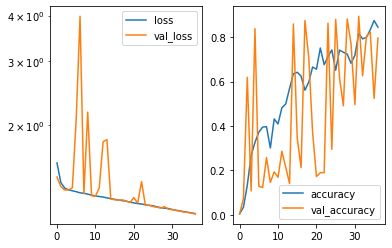

[[2.7830894e-05 1.3293524e-07 9.9999964e-01 5.0852215e-01 5.0141561e-01
  4.9541754e-01 9.9947149e-01 9.9977952e-01 5.7777375e-01]]
True Cell type: BestNuclei
x [[[0.50852215]]]
True positional value x 0.5
y [[[0.5014156]]]
True positional value y 0.5
z [[[0.49541754]]]
True positional value z 0.5
h [[[0.9994715]]]
True positional value h 1.0
w [[[0.9997795]]]
True positional value w 1.0
c [[[0.57777375]]]
True positional value c 1.0


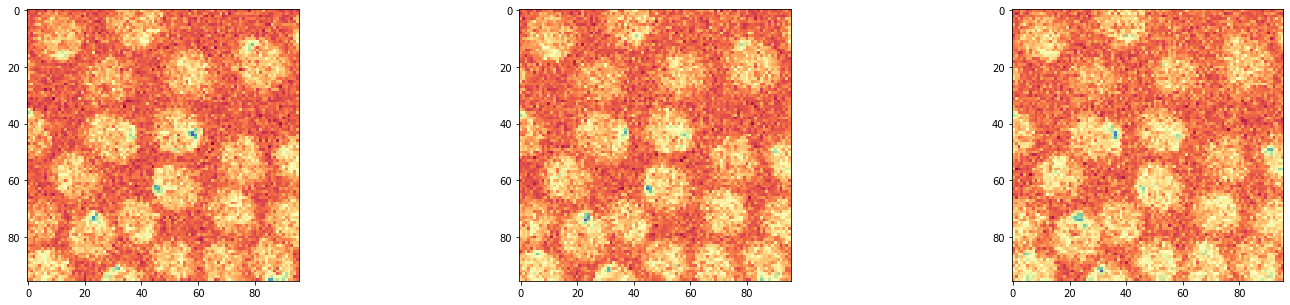

Epoch 38/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1381 - accuracy: 0.8832 - val_loss: 1.1357 - val_accuracy: 0.9246

Epoch 00038: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


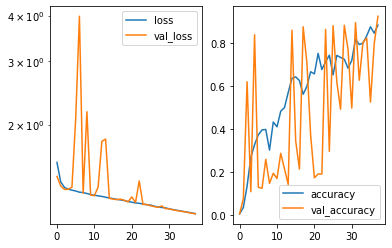

Predicted cell: Totaloff Probability: [[[[9.9999988e-01 1.9075557e-07 1.1038144e-05 5.0887167e-01
    5.0210786e-01 5.0307912e-01 9.9998868e-01 9.9999750e-01
    5.8890998e-01]]]]
True Cell type: Totaloff
x [[[0.5088717]]]
True positional value x 0.5
y [[[0.50210786]]]
True positional value y 0.5
z [[[0.5030791]]]
True positional value z 0.5
h [[[0.9999887]]]
True positional value h 1.0
w [[[0.9999975]]]
True positional value w 1.0
c [[[0.58891]]]
True positional value c 1.0


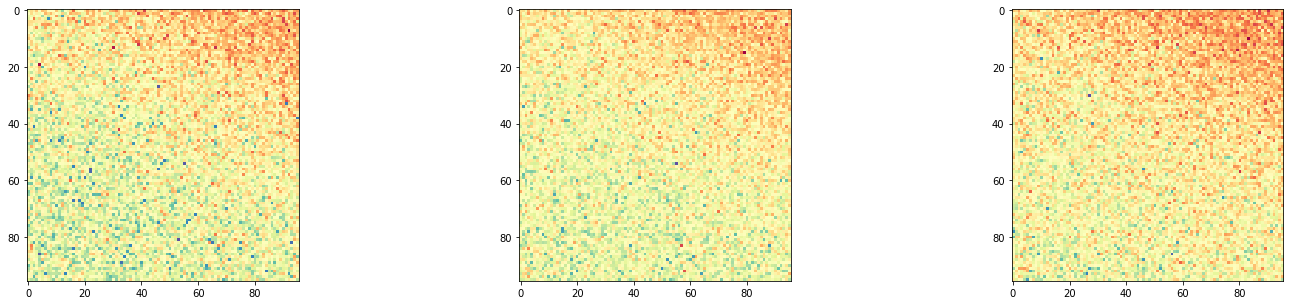

Epoch 39/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1332 - accuracy: 0.8942 - val_loss: 1.1309 - val_accuracy: 0.8877

Epoch 00039: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


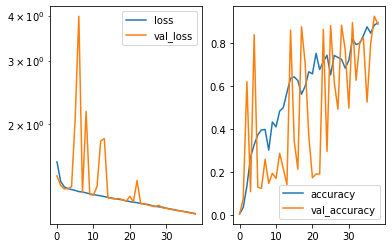

Predicted cell: Totaloff Probability: [[[[9.9997866e-01 8.2282213e-06 9.2610630e-05 5.0230968e-01
    5.0820631e-01 5.0150615e-01 9.9993026e-01 9.9997795e-01
    5.6573409e-01]]]]
True Cell type: Totaloff
x [[[0.5023097]]]
True positional value x 0.5
y [[[0.5082063]]]
True positional value y 0.5
z [[[0.50150615]]]
True positional value z 0.5
h [[[0.99993026]]]
True positional value h 1.0
w [[[0.99997795]]]
True positional value w 1.0
c [[[0.5657341]]]
True positional value c 1.0


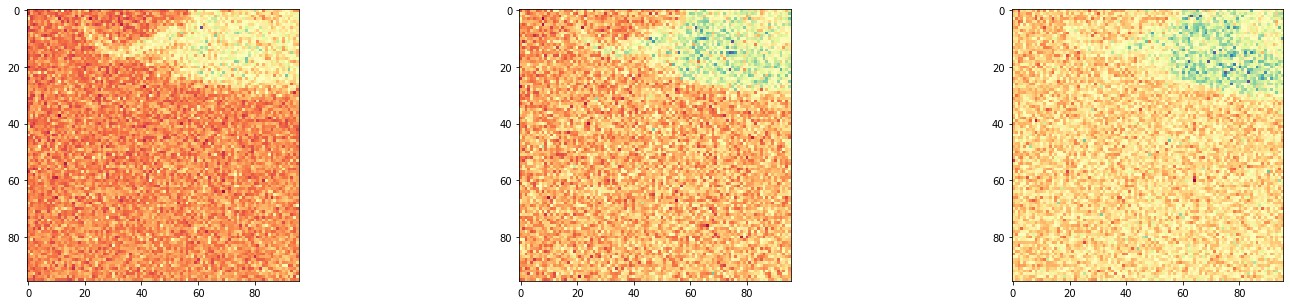

Epoch 40/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1284 - accuracy: 0.8896 - val_loss: 1.1263 - val_accuracy: 0.9228

Epoch 00040: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


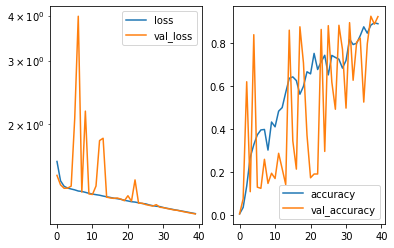

Predicted cell: Totaloff Probability: [[[[9.9999988e-01 2.6260298e-07 2.5185909e-06 4.9516559e-01
    5.0635034e-01 5.0266820e-01 9.9997079e-01 9.9999189e-01
    5.6368226e-01]]]]
True Cell type: Totaloff
x [[[0.4951656]]]
True positional value x 0.5
y [[[0.50635034]]]
True positional value y 0.5
z [[[0.5026682]]]
True positional value z 0.5
h [[[0.9999708]]]
True positional value h 1.0
w [[[0.9999919]]]
True positional value w 1.0
c [[[0.56368226]]]
True positional value c 1.0


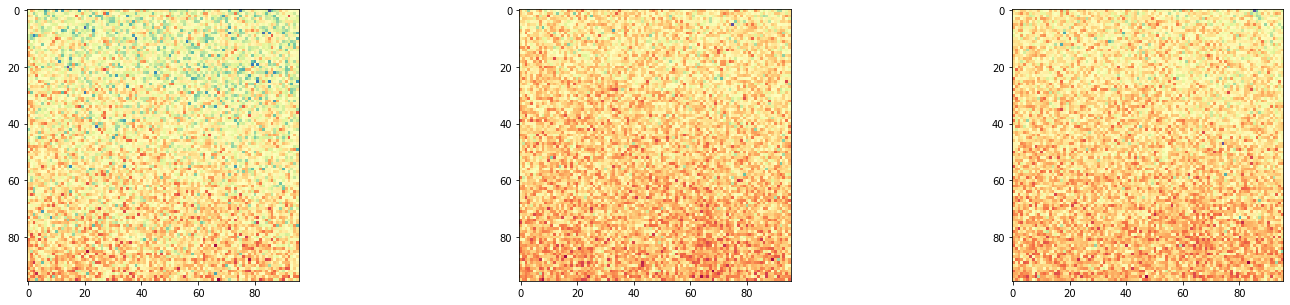

Epoch 41/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1278 - accuracy: 0.8435 - val_loss: 4.9046 - val_accuracy: 0.1351

Epoch 00041: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


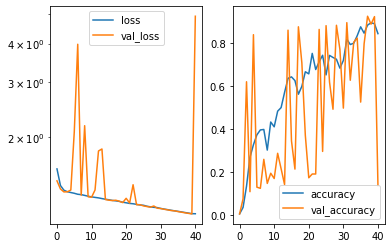

[[3.1754241e-04 3.0922622e-06 9.9997461e-01 4.9129599e-01 4.9404579e-01
  4.9278626e-01 9.9977535e-01 9.9992371e-01 5.6877893e-01]]
True Cell type: BestCad
x [[[0.491296]]]
True positional value x 0.5
y [[[0.4940458]]]
True positional value y 0.5
z [[[0.49278626]]]
True positional value z 0.5
h [[[0.99977535]]]
True positional value h 1.0
w [[[0.9999237]]]
True positional value w 1.0
c [[[0.56877893]]]
True positional value c 1.0


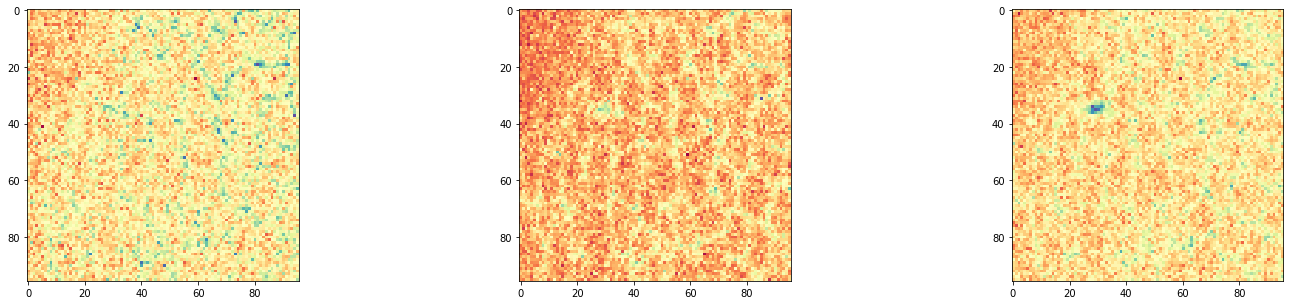

Epoch 42/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1244 - accuracy: 0.8261 - val_loss: 1.1197 - val_accuracy: 0.7158

Epoch 00042: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


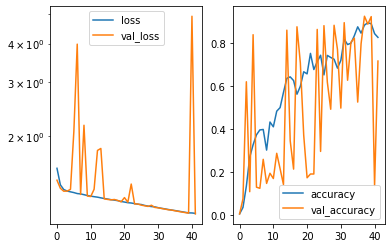

[[7.1734912e-06 9.9999809e-01 1.0274581e-08 4.9919876e-01 5.1466686e-01
  5.0992560e-01 9.9968672e-01 9.9987936e-01 5.7745022e-01]]
True Cell type: BestCad
x [[[0.49919876]]]
True positional value x 0.5
y [[[0.51466686]]]
True positional value y 0.5
z [[[0.5099256]]]
True positional value z 0.5
h [[[0.9996867]]]
True positional value h 1.0
w [[[0.99987936]]]
True positional value w 1.0
c [[[0.5774502]]]
True positional value c 1.0


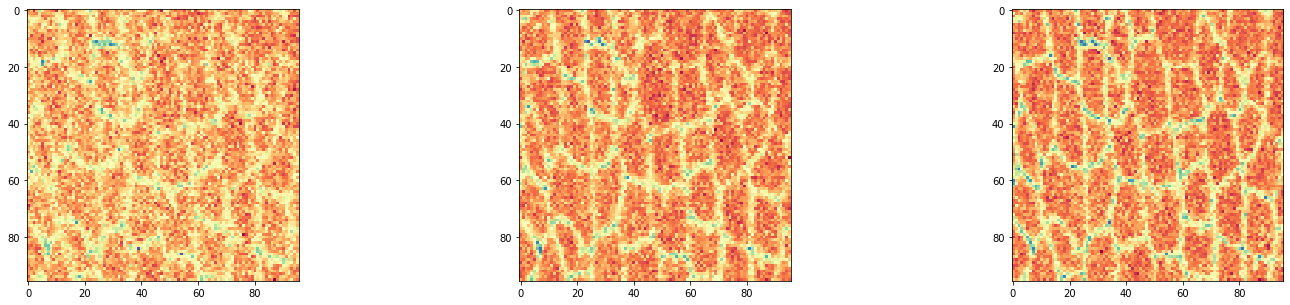

Epoch 43/250
10819/10819 [==============================] - 168s 16ms/step - loss: 1.1157 - accuracy: 0.8775 - val_loss: 1.1134 - val_accuracy: 0.8368

Epoch 00043: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


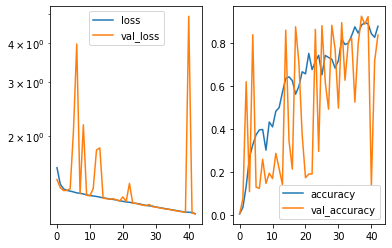

[[9.9763012e-01 8.8229106e-04 3.1035772e-04 4.9746779e-01 5.0307959e-01
  5.0106603e-01 9.9996424e-01 9.9998999e-01 5.8402610e-01]]
True Cell type: Totaloff
x [[[0.4974678]]]
True positional value x 0.5
y [[[0.5030796]]]
True positional value y 0.5
z [[[0.501066]]]
True positional value z 0.5
h [[[0.99996424]]]
True positional value h 1.0
w [[[0.99999]]]
True positional value w 1.0
c [[[0.5840261]]]
True positional value c 1.0


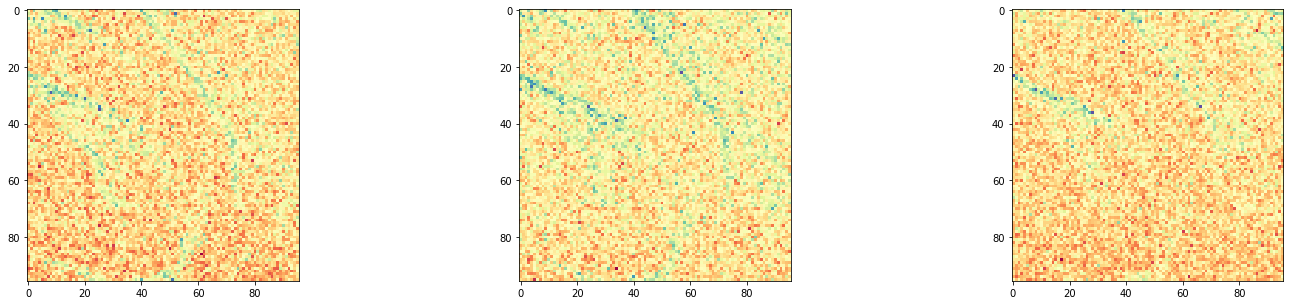

Epoch 44/250
10819/10819 [==============================] - 168s 16ms/step - loss: 1.1109 - accuracy: 0.8839 - val_loss: 1.1092 - val_accuracy: 0.7596

Epoch 00044: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


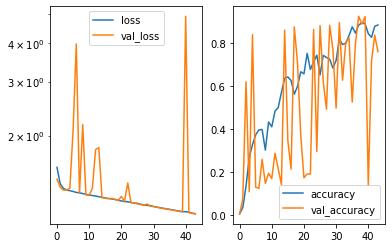

[[8.4184076e-06 9.9999607e-01 9.4929085e-08 4.8493183e-01 5.0754207e-01
  4.8649290e-01 9.9966192e-01 9.9987149e-01 5.6305069e-01]]
True Cell type: BestCad
x [[[0.48493183]]]
True positional value x 0.5
y [[[0.5075421]]]
True positional value y 0.5
z [[[0.4864929]]]
True positional value z 0.5
h [[[0.9996619]]]
True positional value h 1.0
w [[[0.9998715]]]
True positional value w 1.0
c [[[0.5630507]]]
True positional value c 1.0


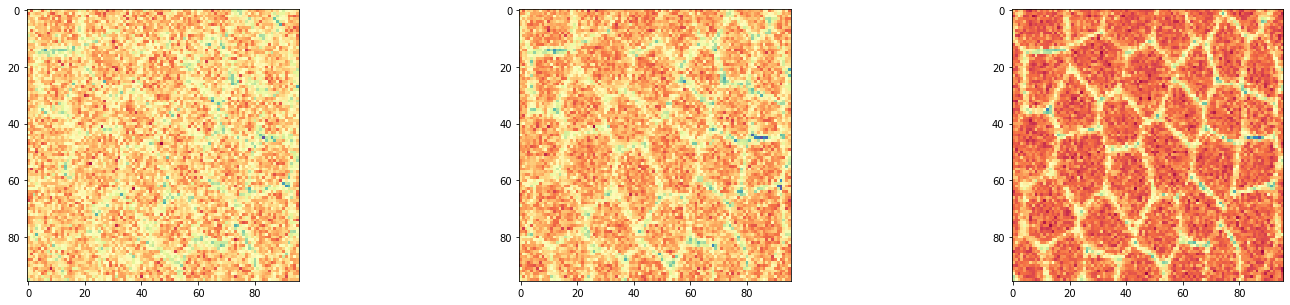

Epoch 45/250
10819/10819 [==============================] - 169s 16ms/step - loss: 1.1122 - accuracy: 0.8109 - val_loss: 1.1070 - val_accuracy: 0.5456

Epoch 00045: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


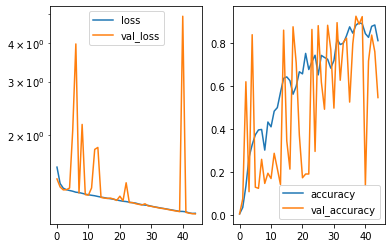

[[9.9994254e-01 6.4179607e-05 7.5833759e-07 5.0739485e-01 5.0200075e-01
  5.1310980e-01 9.9994743e-01 9.9998343e-01 5.7392037e-01]]
True Cell type: Totaloff
x [[[0.50739485]]]
True positional value x 0.5
y [[[0.50200075]]]
True positional value y 0.5
z [[[0.5131098]]]
True positional value z 0.5
h [[[0.9999474]]]
True positional value h 1.0
w [[[0.99998343]]]
True positional value w 1.0
c [[[0.57392037]]]
True positional value c 1.0


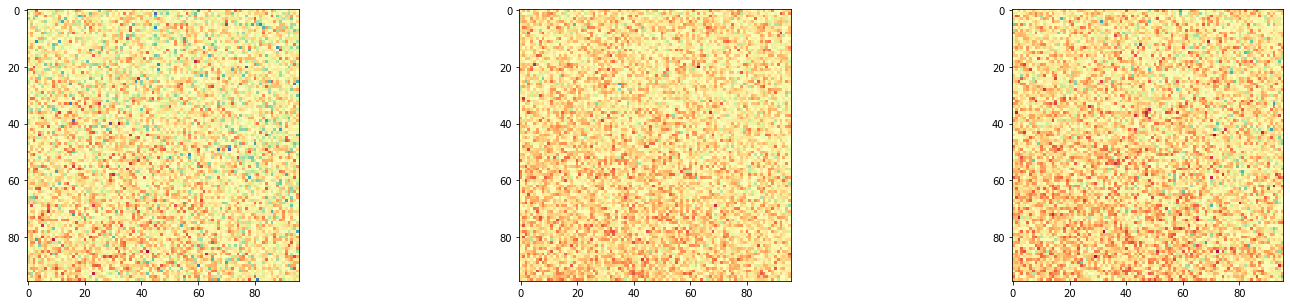

Epoch 46/250
10819/10819 [==============================] - 170s 16ms/step - loss: 1.1031 - accuracy: 0.8055 - val_loss: 1.0998 - val_accuracy: 0.9211

Epoch 00046: saving model to /home/sancere/Kepler/CurieDeepLearningModels/OneatModels/Focusoneatmodels/cadhistoned29s4f16resmulti.h5


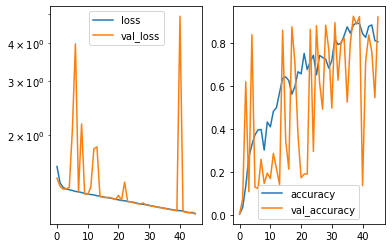

Predicted cell: Totaloff Probability: [[[[1.0000000e+00 3.6807450e-09 2.9318562e-06 5.0116664e-01
    5.0169563e-01 4.9547619e-01 9.9999261e-01 9.9999845e-01
    5.9157777e-01]]]]
True Cell type: Totaloff
x [[[0.50116664]]]
True positional value x 0.5
y [[[0.50169563]]]
True positional value y 0.5
z [[[0.4954762]]]
True positional value z 0.5
h [[[0.9999926]]]
True positional value h 1.0
w [[[0.99999845]]]
True positional value w 1.0
c [[[0.59157777]]]
True positional value c 1.0


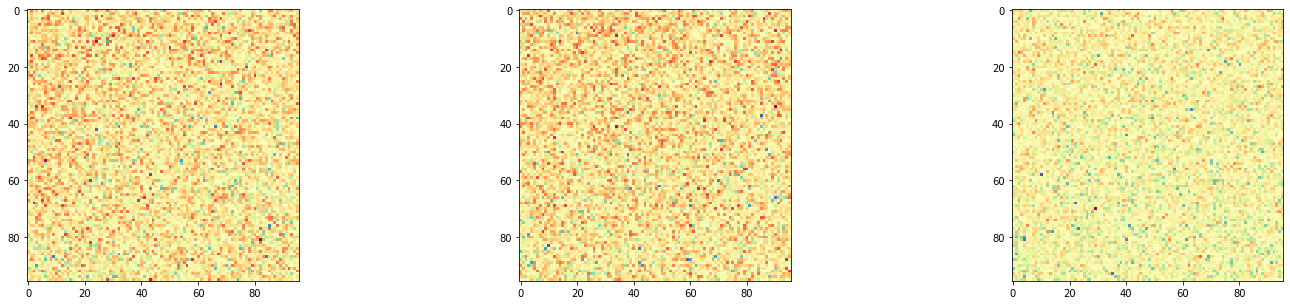

Epoch 47/250
 7680/10819 [====================>.........] - ETA: 48s - loss: 1.0980 - accuracy: 0.8777

In [ ]:
Train = NEATFocus(config, model_dir, model_name)

Train.loadData()

Train.TrainModel()